In [12]:
import torch
from torch.autograd import Variable
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

In [20]:
with open('data.txt','r') as f:
    data_list = f.readlines()
    data_list = [i.split('\n')[0] for i in data_list]
    data_list = [i.split(',') for i in data_list]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]
data[0]

(34.62365962451697, 78.0246928153624, 0.0)

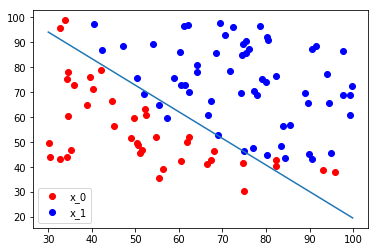

In [29]:
x0 = list(filter(lambda x: x[-1] == 0.0, data))
x1 = list(filter(lambda x: x[-1] == 1.0, data))
plot_x0_0 = [i[0] for i in x0]
plot_x0_1 = [i[1] for i in x0]
plot_x1_0 = [i[0] for i in x1]
plot_x1_1 = [i[1] for i in x1]

plt.plot(plot_x0_0, plot_x0_1, 'ro', label = "x_0")
plt.plot(plot_x1_0, plot_x1_1, 'bo', label = "x_1")
# 设置图例的显示位置
plt.legend(loc = 'best')

# 训练完成后画的直线图
w0, w1 = logistic_model.lr.weight[0]
w0 = w0.item()
w1 = w1.item()
b = logistic_model.lr.bias.item()
plot_x = np.arange(30, 100 ,0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.plot(plot_x, plot_y)

plt.show()

In [21]:
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

In [22]:
# 定义模型
class LogistRegression(nn.Module):
    def __init__(self):
        super(LogistRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
    
    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        return x

logistic_model = LogistRegression()
logistic_model.cuda()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3, momentum=0.9)

In [30]:
# 训练模型
for epoch in range(50000):
    x = Variable(x_data).cuda()
    y = Variable(y_data).cuda()
    # 前向传播
    out = logistic_model(x)
    loss = criterion(out, y)
    print_loss = loss.item()
    # 判断大于0.5就等于1 小于0.5就等于0
    mask = out.ge(0.5).float()
    correct = (mask == y).sum()
    acc = correct.item() / x.size(0)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(epoch+1) % 10000 == 0:
        print('*'*10)
        print('epoch {}'.format(epoch+1))
        print('loss is {:.4f}'.format(print_loss))
        print('acc is {:.4f}'.format(acc))

**********
epoch 10000
loss is 0.2429
acc is 0.9000
**********
epoch 20000
loss is 0.2365
acc is 0.8900
**********
epoch 30000
loss is 0.2316
acc is 0.8900
**********
epoch 40000
loss is 0.2276
acc is 0.8900
**********
epoch 50000
loss is 0.2245
acc is 0.8900
